In [209]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [210]:
df=pd.read_csv("C:\\Users\\Cmejri\\Desktop\\train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [211]:
df=df[['PassengerId','Pclass','Survived','Sex','Age','Parch','Fare','Embarked']]

In [212]:
df.head()

,PassengerId,Pclass,Survived,Sex,Age,Parch,Fare,Embarked
0,1,3,0,male,22.0,0,7.2500,S
1,2,1,1,female,38.0,0,71.2833,C
2,3,3,1,female,26.0,0,7.9250,S
3,4,1,1,female,35.0,0,53.1000,S
4,5,3,0,male,35.0,0,8.0500,S


In [213]:
df.isnull().sum()

PassengerId      0
Pclass           0
Survived         0
Sex              0
Age            177
Parch            0
Fare             0
Embarked         2
dtype: int64

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Survived     891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [215]:
x=df['Age'].mean()
x

29.69911764705882

In [216]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [217]:
df['Age'].fillna(29.6991, inplace=True)
df['Embarked'].fillna('S', inplace=True)
df.shape

(891, 8)

In [218]:
df.isnull().sum()

PassengerId    0
Pclass         0
Survived       0
Sex            0
Age            0
Parch          0
Fare           0
Embarked       0
dtype: int64

Text(0, 0.5, 'Survived')

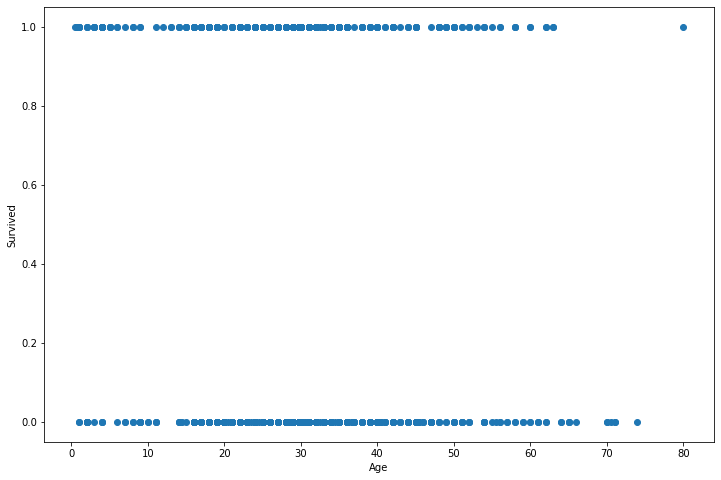

In [219]:
fig, ax=plt.subplots(figsize=(12,8))
plt.scatter(df['Age'], df['Survived'])
plt.xlabel('Age')
plt.ylabel('Survived')

Text(0, 0.5, 'Survived')

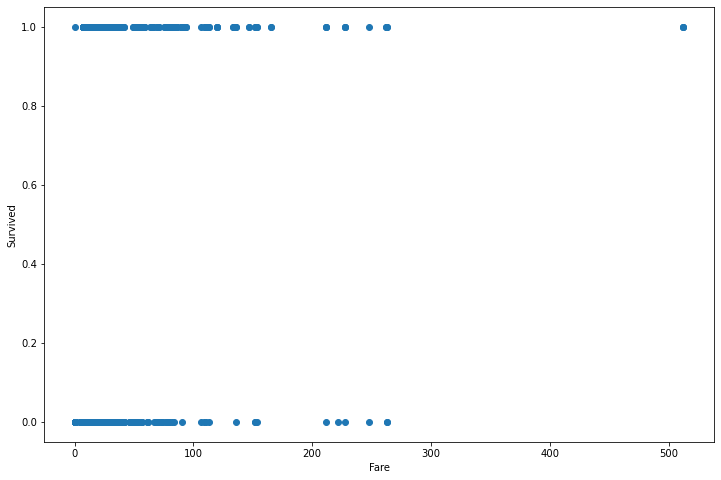

In [220]:
fig, ax=plt.subplots(figsize=(12,8))
plt.scatter(df['Fare'], df['Survived'])
plt.xlabel('Fare')
plt.ylabel('Survived')

In [221]:
pd.crosstab(df['Sex'], df['Survived'])

Survived,0,1
Sex,,
female,81,233
male,468,109


In [222]:
pd.crosstab(df['Pclass'], df['Survived'])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [223]:
df_corr=df.corr()

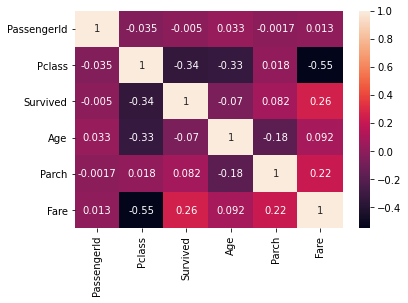

In [224]:
sns.heatmap(df_corr, annot=True)

In [225]:
Label_encoding=preprocessing.LabelEncoder()

In [226]:
df['Sex']=Label_encoding.fit_transform(df['Sex'])

In [227]:
df.head()

,PassengerId,Pclass,Survived,Sex,Age,Parch,Fare,Embarked
0,1,3,0,1,22.0,0,7.2500,S
1,2,1,1,0,38.0,0,71.2833,C
2,3,3,1,0,26.0,0,7.9250,S
3,4,1,1,0,35.0,0,53.1000,S
4,5,3,0,1,35.0,0,8.0500,S


In [228]:
Label_encoding.classes_

array(['female', 'male'], dtype=object)

In [229]:
df=pd.get_dummies(df, columns=['Embarked'])

In [230]:
df.head()

,PassengerId,Pclass,Survived,Sex,Age,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,3,0,1,22.0,0,7.2500,0,0,1
1,2,1,1,0,38.0,0,71.2833,1,0,0
2,3,3,1,0,26.0,0,7.9250,0,0,1
3,4,1,1,0,35.0,0,53.1000,0,0,1
4,5,3,0,1,35.0,0,8.0500,0,0,1


In [231]:
X=df.drop('Survived', axis=1)
Y=df['Survived']
x_train, x_test, y_train, y_test=train_test_split(X, Y, test_size=0.2)

In [232]:
x_train.shape, y_train.shape

((712, 9), (712,))

In [233]:
x_test.shape, y_test.shape

((179, 9), (179,))

In [234]:
lg=LogisticRegression().fit(x_train,y_train)

C:\Python3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [235]:
pred=lg.predict(x_test)

In [236]:
pred_results=pd.DataFrame({'y_test':y_test, 
                            'y_pred':pred})

In [237]:
pred_results.head()

,y_test,y_pred
326,0,0
81,1,0
398,0,0
459,0,0
558,1,1


In [238]:
confusion_matrix=pd.crosstab(pred_results['y_pred'], pred_results['y_test'])
confusion_matrix

y_test,0,1
y_pred,,
0,92,28
1,17,42


In [239]:
acc=accuracy_score(y_test, pred)
prec=precision_score(y_test, pred)
recall=recall_score(y_test, pred)

print("accuracy score:",acc)
print("precision score:",prec)
print("recall score:",recall)

accuracy score: 0.7486033519553073
precision score: 0.711864406779661
recall score: 0.6


# ROC / AUC

In [240]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [241]:
auc = roc_auc_score(y_test, pred)
print('AUC: %.2f' % auc)

AUC: 0.72


In [242]:
fpr, tpr, th = roc_curve(y_test, pred)

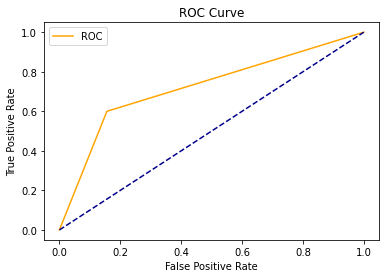

In [243]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()